In [95]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
%config InlineBackend.figure_format = 'retina'
plt.rc('pdf', fonttype=42)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['font.family'] = 'serif'

In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('results/model_params_and_results.csv')

In [98]:
df['score'] = [abs(x) for x in df['score']]

In [99]:
df

,num_hidden_layers,hidden_layer_size,activation_function,score
0,0,0,linear,2.584747
1,0,0,relu,7.227311
2,0,0,sigmoid,3.625803
3,0,0,tanh,3.625803
4,1,64,linear,0.289578
5,1,64,relu,0.497862
6,1,64,sigmoid,0.297948
7,1,64,tanh,0.310448
8,1,128,linear,0.279975
9,1,128,relu,0.259806


# Plotting the results in a more interpretable fashion

# Number of hidden layers

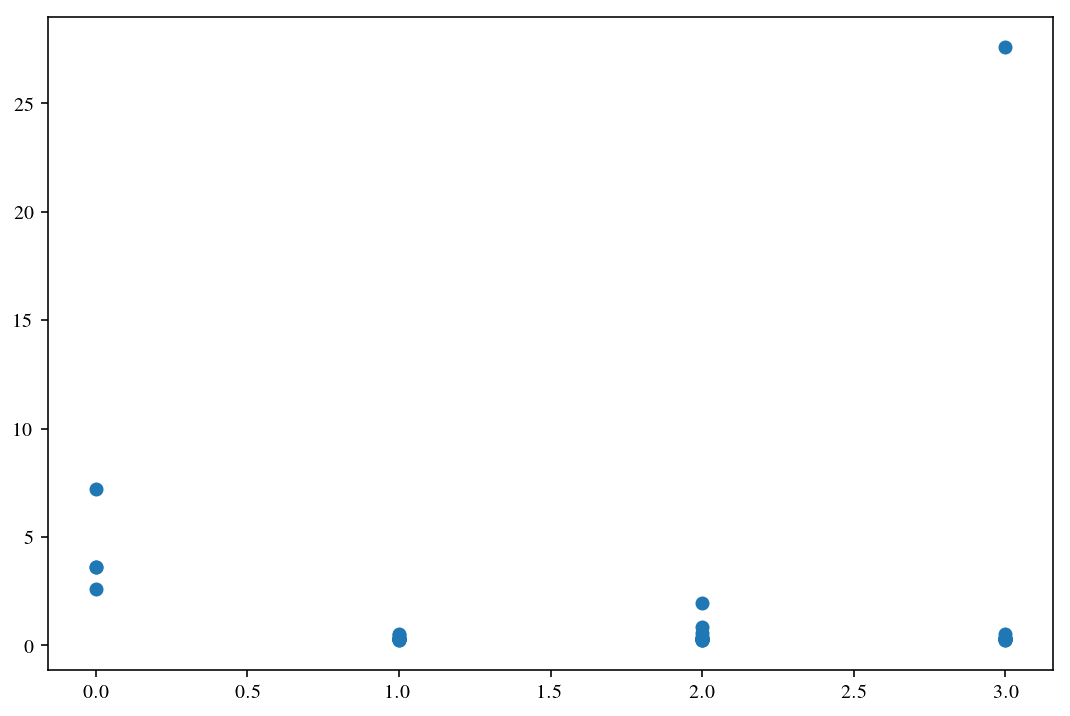

In [100]:
plt.scatter(df['num_hidden_layers'], df['score'])

In [101]:
df_ = df[df['score'] <= 1.0]

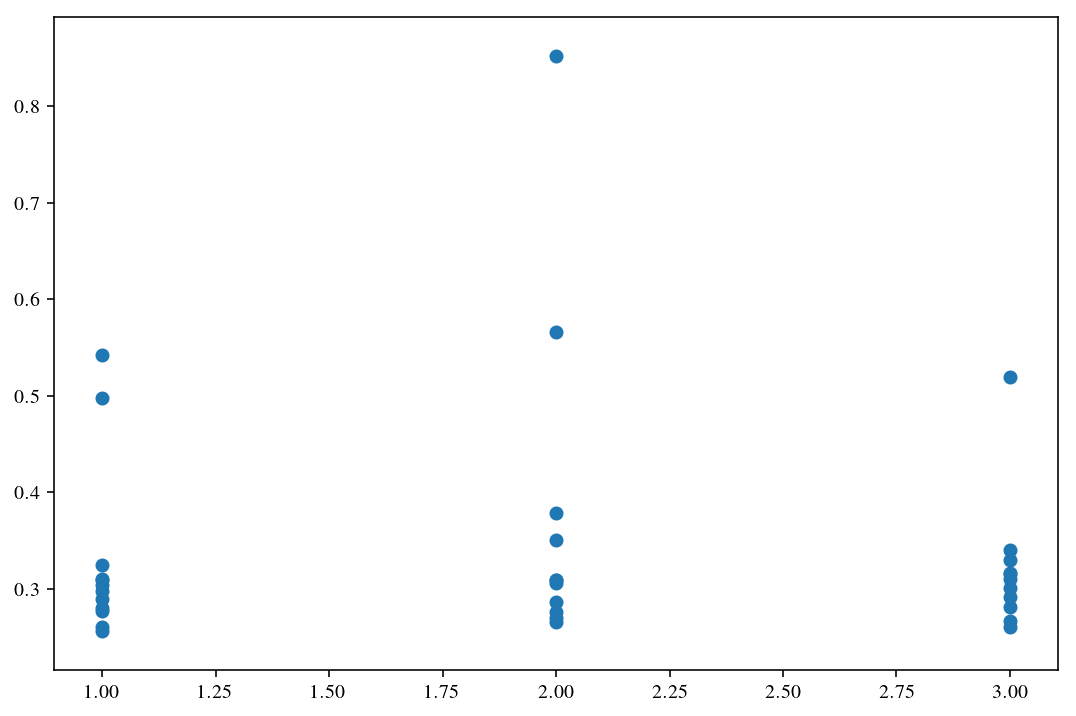

In [102]:
plt.scatter(df_['num_hidden_layers'], df_['score'])

It looks like these will be better represented with confidence intervals and means.

In [103]:
import numpy as np

In [104]:
# Need to calculate the means for each
# And the std dev for each

In [105]:
mean_zero = df[df['num_hidden_layers'] == 0]['score'].mean()
mean_one = df[df['num_hidden_layers'] == 1]['score'].mean()
mean_two = df[df['num_hidden_layers'] == 2]['score'].mean()
mean_three = df[df['num_hidden_layers'] == 3]['score'].mean()

In [106]:
std_zero = df[df['num_hidden_layers'] == 0]['score'].std()
std_one = df[df['num_hidden_layers'] == 1]['score'].std()
std_two = df[df['num_hidden_layers'] == 2]['score'].std()
std_three = df[df['num_hidden_layers'] == 3]['score'].std()

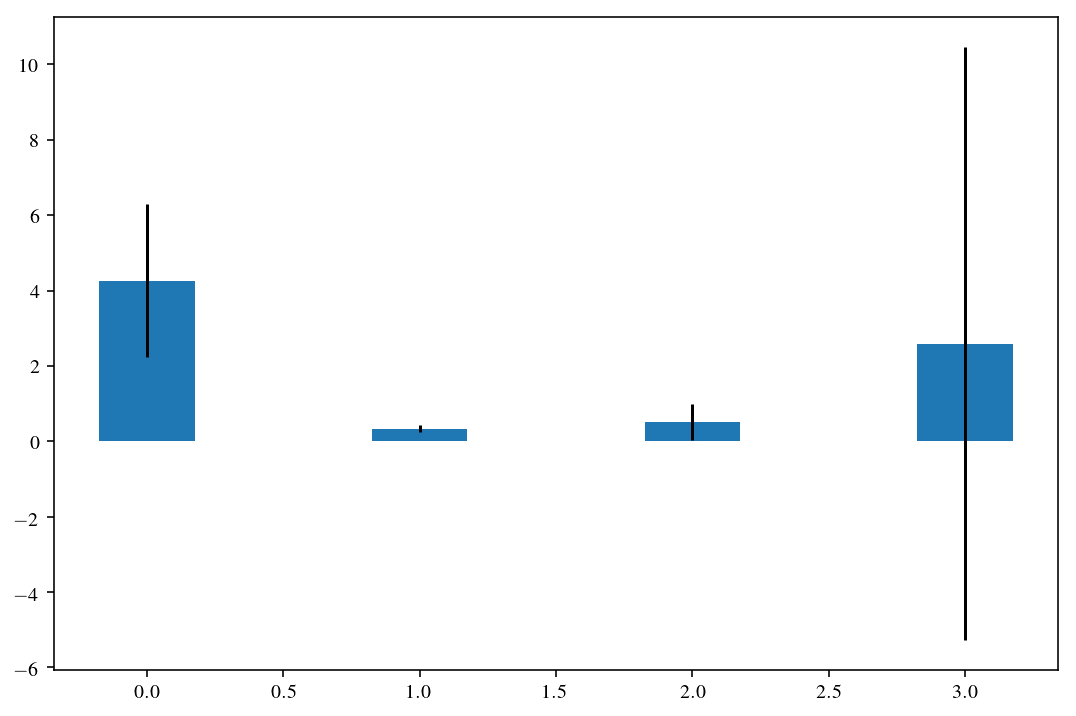

In [107]:
fig, ax = plt.subplots()
a = ax.bar([0,1,2,3], [mean_zero, mean_one, mean_two, mean_three], 0.35, yerr=[std_zero, std_one, std_two, std_three])
plt.show()

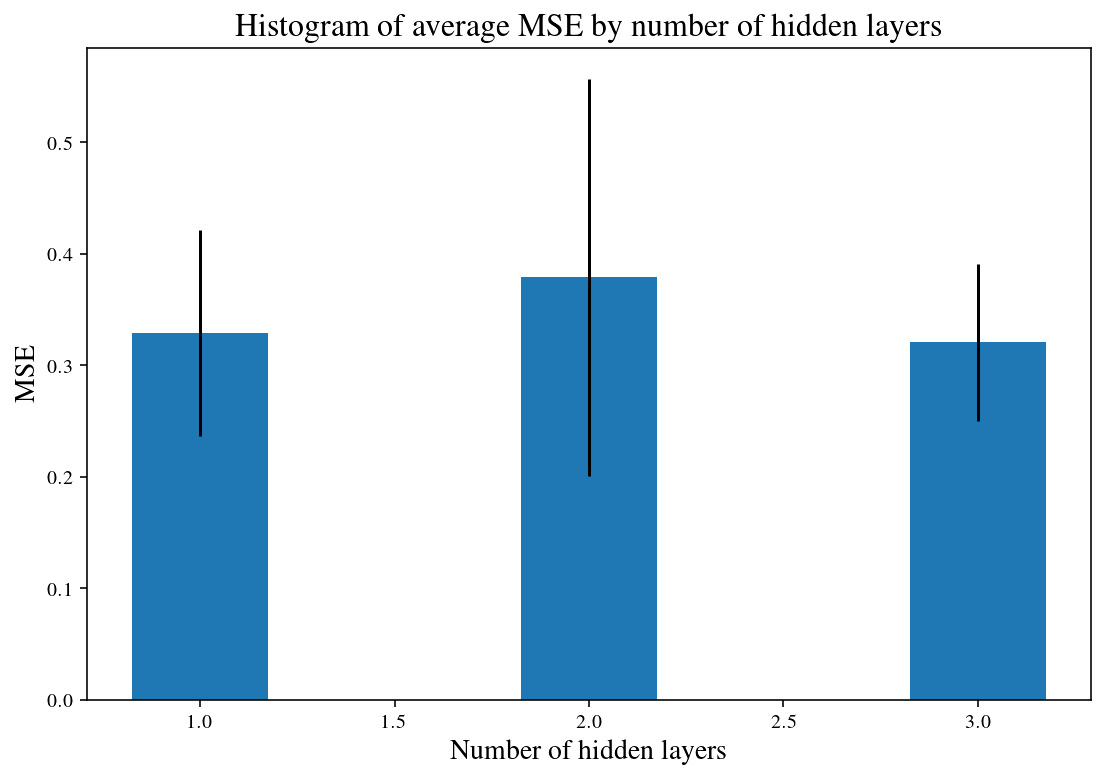

In [117]:
# Same but only for df_
mean_zero = df_[df_['num_hidden_layers'] == 0]['score'].mean()
mean_one = df_[df_['num_hidden_layers'] == 1]['score'].mean()
mean_two = df_[df_['num_hidden_layers'] == 2]['score'].mean()
mean_three = df_[df_['num_hidden_layers'] == 3]['score'].mean()

std_zero = df_[df_['num_hidden_layers'] == 0]['score'].std()
std_one = df_[df_['num_hidden_layers'] == 1]['score'].std()
std_two = df_[df_['num_hidden_layers'] == 2]['score'].std()
std_three = df_[df_['num_hidden_layers'] == 3]['score'].std()

fig, ax = plt.subplots()
#Zero omitted as none with MSE < 1.0
a = ax.bar([1,2,3], [mean_one, mean_two, mean_three], 0.35, yerr=[std_one, std_two, std_three])
plt.title('Histogram of average MSE by number of hidden layers',size=16)
plt.ylabel('MSE',size=14)
plt.xlabel('Number of hidden layers',size=14)
plt.show()

,num_hidden_layers,hidden_layer_size,activation_function,score
4,1,64,linear,0.289578
5,1,64,relu,0.497862
6,1,64,sigmoid,0.297948
7,1,64,tanh,0.310448
8,1,128,linear,0.279975
9,1,128,relu,0.259806
10,1,128,sigmoid,0.277095
11,1,128,tanh,0.309183
12,1,256,linear,0.542272
13,1,256,relu,0.324746


The first graph shows that 0 and 3 layers can lead to extremely high variance in the error rate of the model. This is likely due to the fact that 0 layers performed poorly and 3 layers sometimes failed to converge on an optimal solution in sufficient time.

# Hidden layer size

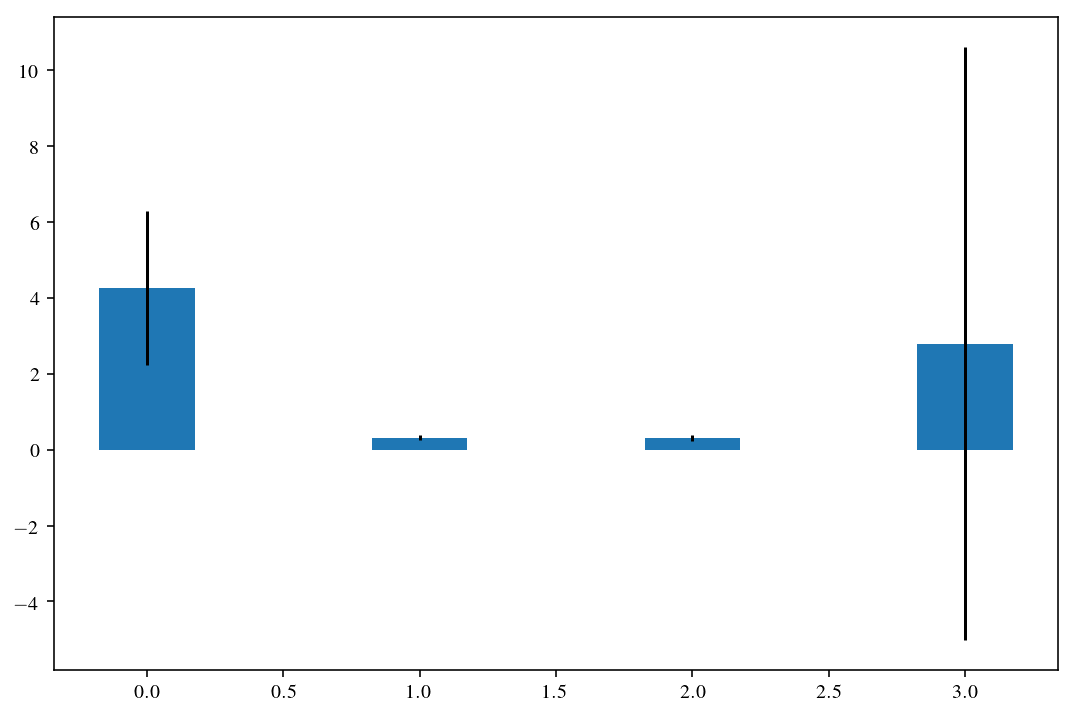

In [22]:

mean_zero = df[df['hidden_layer_size'] == 0]['score'].mean()
mean_one = df[df['hidden_layer_size'] == 64]['score'].mean()
mean_two = df[df['hidden_layer_size'] == 128]['score'].mean()
mean_three = df[df['hidden_layer_size'] == 256]['score'].mean()

std_zero = df[df['hidden_layer_size'] == 0]['score'].std()
std_one = df[df['hidden_layer_size'] == 64]['score'].std()
std_two = df[df['hidden_layer_size'] == 128]['score'].std()
std_three = df[df['hidden_layer_size'] == 256]['score'].std()

fig, ax = plt.subplots()
a = ax.bar([0,1,2,3], [mean_zero, mean_one, mean_two, mean_three], 0.35, yerr=[std_zero, std_one, std_two, std_three])
plt.show()

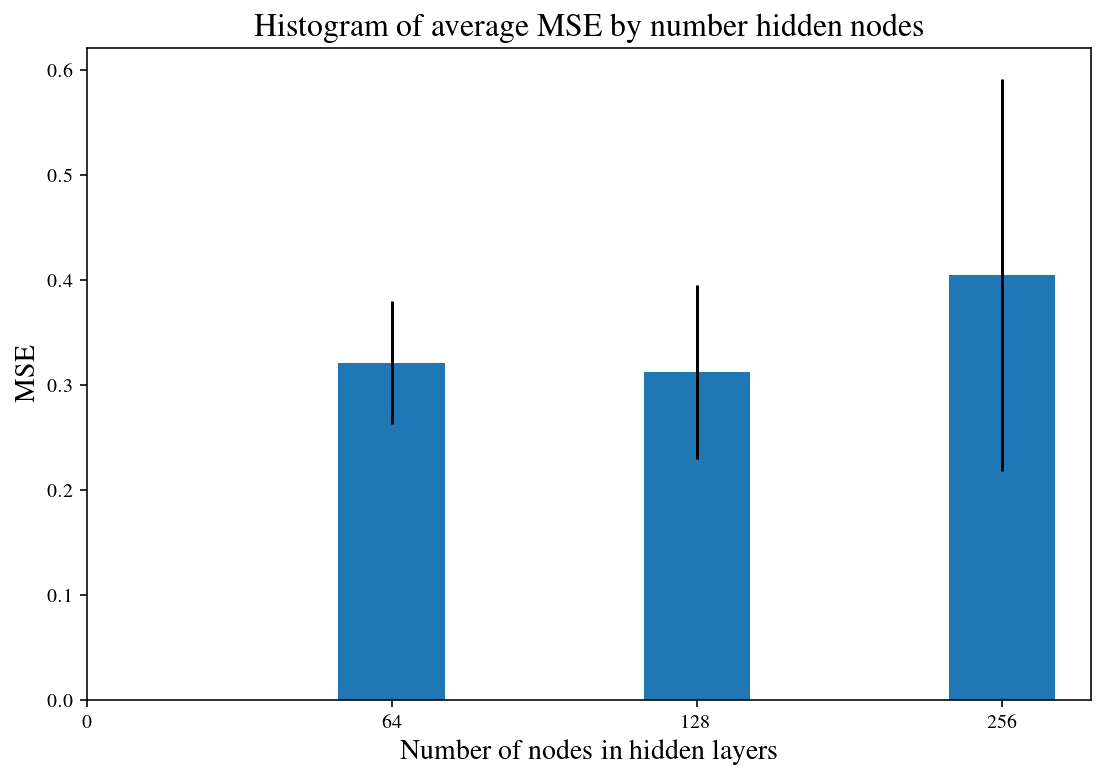

In [129]:
# Same but only for df_
mean_zero = df_[df_['hidden_layer_size'] == 0]['score'].mean()
mean_one = df_[df_['hidden_layer_size'] == 64]['score'].mean()
mean_two = df_[df_['hidden_layer_size'] == 128]['score'].mean()
mean_three = df_[df_['hidden_layer_size'] == 256]['score'].mean()

std_zero = df_[df_['hidden_layer_size'] == 0]['score'].std()
std_one = df_[df_['hidden_layer_size'] == 64]['score'].std()
std_two = df_[df_['hidden_layer_size'] == 128]['score'].std()
std_three = df_[df_['hidden_layer_size'] == 256]['score'].std()

fig, ax = plt.subplots()
# zero is again omitted
a = ax.bar([1,2,3], [mean_one, mean_two, mean_three], 0.35, yerr=[std_one, std_two, std_three])
plt.title('Histogram of average MSE by number hidden nodes',size=16)
plt.ylabel('MSE',size=14)
plt.xlabel('Number of nodes in hidden layers',size=14)
plt.xticks( range(4), ('0','64', '128', '256',''))
plt.show()

# Activation function

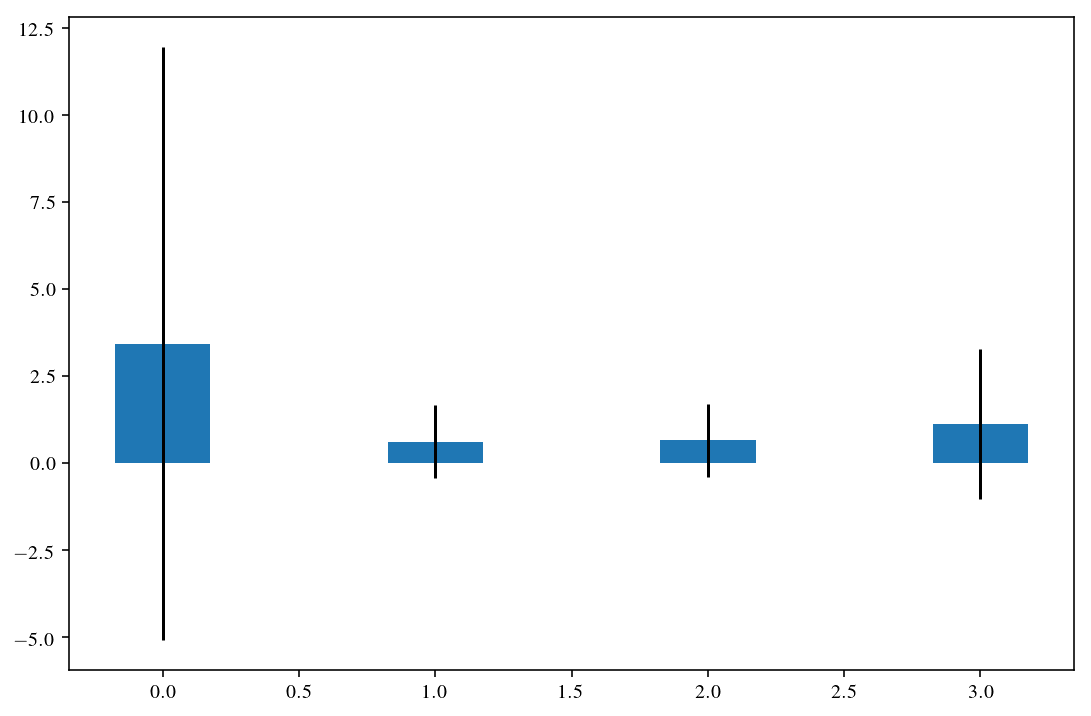

In [26]:
# Same but only for df_
mean_zero = df[df['activation_function'] == 'linear']['score'].mean()
mean_one = df[df['activation_function'] == 'sigmoid']['score'].mean()
mean_two = df[df['activation_function'] == 'tanh']['score'].mean()
mean_three = df[df['activation_function'] == 'relu']['score'].mean()

std_zero = df[df['activation_function'] == 'linear']['score'].std()
std_one = df[df['activation_function'] == 'sigmoid']['score'].std()
std_two = df[df['activation_function'] == 'tanh']['score'].std()
std_three = df[df['activation_function'] == 'relu']['score'].std()

fig, ax = plt.subplots()
a = ax.bar([0,1,2,3], [mean_zero, mean_one, mean_two, mean_three], 0.35, yerr=[std_zero, std_one, std_two, std_three])
plt.show()

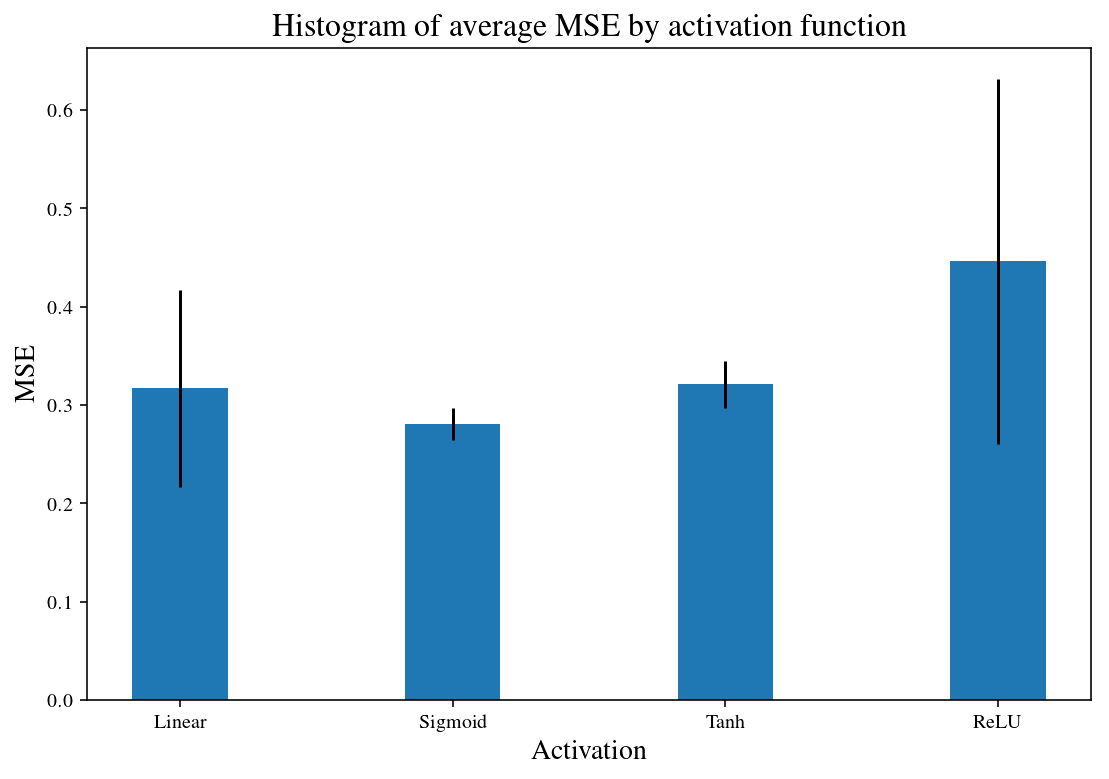

In [130]:
# Same but only for df_
mean_zero = df_[df_['activation_function'] == 'linear']['score'].mean()
mean_one = df_[df_['activation_function'] == 'sigmoid']['score'].mean()
mean_two = df_[df_['activation_function'] == 'tanh']['score'].mean()
mean_three = df_[df_['activation_function'] == 'relu']['score'].mean()

std_zero = df_[df_['activation_function'] == 'linear']['score'].std()
std_one = df_[df_['activation_function'] == 'sigmoid']['score'].std()
std_two = df_[df_['activation_function'] == 'tanh']['score'].std()
std_three = df_[df_['activation_function'] == 'relu']['score'].std()

fig, ax = plt.subplots()
a = ax.bar([0,1,2,3], [mean_zero, mean_one, mean_two, mean_three], 0.35, yerr=[std_zero, std_one, std_two, std_three])
plt.title('Histogram of average MSE by activation function',size=16)
plt.ylabel('MSE',size=14)
plt.xlabel('Activation',size=14)
plt.xticks( range(4), ('Linear','Sigmoid', 'Tanh', 'ReLU',''))
plt.show()

Overall we see much narrower confidence intervals for the sigmoid and tanh activations, suggesting that they tend to perform much more consistently. 

### Plot idea: Do 3D plots of hidden layers and layer size against score for each activation function, based on the results of the regression model. Do these with and without > 1.0 removed.

In [59]:
# Function to calculate MSE based on the output of the regression analyses
def est_MSE(num_layers, num_nodes):
    score = 0.2664 + (-0.0013*num_layers) + (0.0009*num_nodes) + ((num_layers*num_nodes)*-0.0004)
    return score

In [60]:
est_MSE(256,500)

-50.8164

In [61]:
x1 = list(range(0,256))
x2 = list(range(0,))

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as cm

In [82]:
max_nodes = 256
max_layers = 3

In [83]:
x_surf =np.arange(0,max_nodes+1,1)
y_surf = np.arange(0,max_layers+1,1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

In [84]:
x_surf.shape

(4, 257)

In [85]:
y_surf.shape

(4, 257)

In [86]:
results = np.zeros((max_layers+1,max_nodes+1))

In [87]:
results.shape

(4, 257)

In [88]:
for i in range(0,max_layers+1):
    for j in range(0,max_nodes+1):
            results[i,j] = est_MSE(x_surf[i][j], y_surf[i][j])

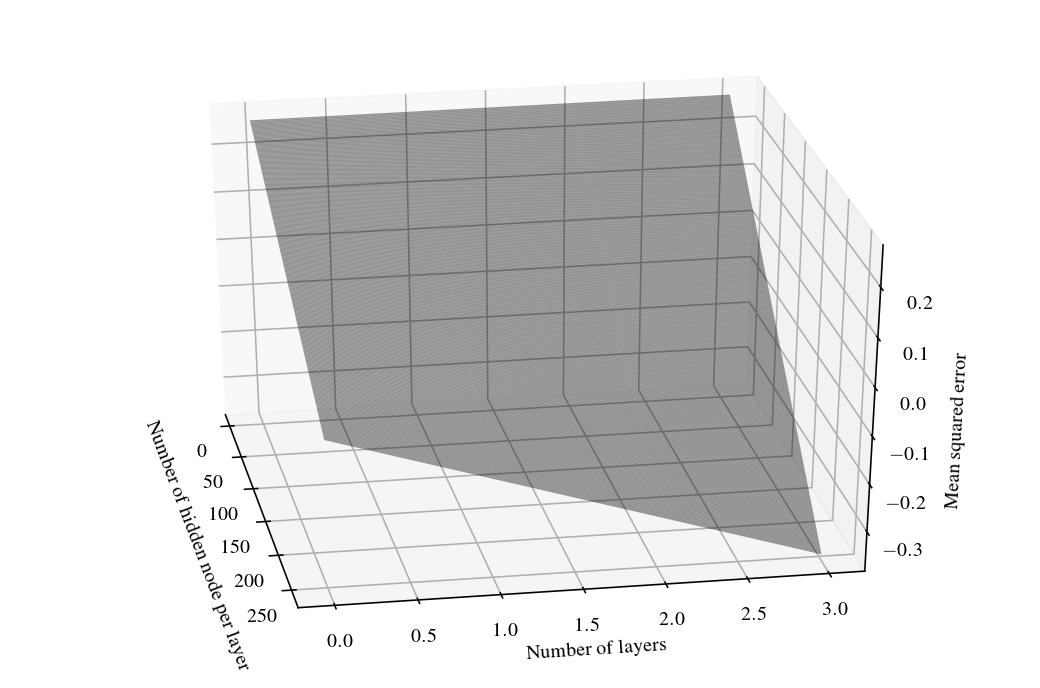

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_surf, y_surf,
                results,
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

#ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
#           c='blue',
#           marker='o',
#           alpha=1)
ax.set_xlabel('Number of hidden node per layer')
ax.set_ylabel('Number of layers')
ax.set_zlabel('Mean squared error')

# rotate the axes and update
for angle in range(0, 360):
    if angle%10 == 0:
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(1)

I'm not totally convinced this is correct and I don't think it captures much useful information. Really I'm not even sure that the figures help to show what is going on - my N is very low and a number of observations are highly skewed. I could ask the editors whether they think the histograms are appropriate or whether the table is sufficient.